In [1]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_detail = pd.read_csv('data_stock_info.csv', sep='|')
stock_detail.head()

,stock_name,stock_isin,stock_euronext_symbol,stock_exchange_markets,stock_trading_currency,main_city,yahoo_city_code,yahoo_code
0,1000MERCIS,FR0010285965,ALMIL,Euronext Growth Paris,EUR,Paris,PA,ALMIL.PA
1,2020 BULKERS,BMG9156K1018,2020,Oslo Børs,NOK,Oslo,OL,2020.OL
2,2CRSI,FR0013341781,2CRSI,Euronext Paris,EUR,Paris,PA,2CRSI.PA
3,2MX ORGANIC,FR0014000T90,2MX,Euronext Paris,EUR,Paris,PA,2MX.PA
4,2MX ORGANIC BS,FR0014000TB2,2MXBS,Euronext Paris,EUR,Paris,PA,2MXBS.PA


In [3]:
price_info = pd.read_csv('data_price_history.csv', sep='|', index_col='date')
price_info.head()


,open_price,high_price,low_price,close_price,adjusted_close_price,trading_volume,stock_isin,Dividends,Stock Splits
date,,,,,,,,,
2018-06-22,9.00,9.68,8.90,9.50,NaN,677679.0,FR0013341781,0.0,0.0
2018-06-25,9.66,9.80,9.10,9.32,NaN,102472.0,FR0013341781,0.0,0.0
2018-06-26,9.56,9.56,9.14,9.22,NaN,35033.0,FR0013341781,0.0,0.0
2018-06-27,9.20,9.34,9.10,9.28,NaN,53496.0,FR0013341781,0.0,0.0
2018-06-28,9.28,9.28,9.20,9.28,NaN,4160.0,FR0013341781,0.0,0.0


In [4]:
# Left join 
price_info = pd.merge(
    price_info, stock_detail, on='stock_isin', how='left')
price_info.head()


,open_price,high_price,low_price,close_price,adjusted_close_price,trading_volume,stock_isin,Dividends,Stock Splits,stock_name,stock_euronext_symbol,stock_exchange_markets,stock_trading_currency,main_city,yahoo_city_code,yahoo_code
0,9.00,9.68,8.90,9.50,NaN,677679.0,FR0013341781,0.0,0.0,2CRSI,2CRSI,Euronext Paris,EUR,Paris,PA,2CRSI.PA
1,9.66,9.80,9.10,9.32,NaN,102472.0,FR0013341781,0.0,0.0,2CRSI,2CRSI,Euronext Paris,EUR,Paris,PA,2CRSI.PA
2,9.56,9.56,9.14,9.22,NaN,35033.0,FR0013341781,0.0,0.0,2CRSI,2CRSI,Euronext Paris,EUR,Paris,PA,2CRSI.PA
3,9.20,9.34,9.10,9.28,NaN,53496.0,FR0013341781,0.0,0.0,2CRSI,2CRSI,Euronext Paris,EUR,Paris,PA,2CRSI.PA
4,9.28,9.28,9.20,9.28,NaN,4160.0,FR0013341781,0.0,0.0,2CRSI,2CRSI,Euronext Paris,EUR,Paris,PA,2CRSI.PA


In [5]:
value_counts_accross_cities_and_exchange_euronext_extraction = stock_detail.groupby(['main_city', 'stock_exchange_markets'], as_index=False)[
    'stock_isin'].nunique().rename(columns={'stock_isin': 'euronext_coverage'})
value_counts_accross_cities_and_exchange_yahoo_finance_extraction = price_info.groupby(['main_city', 'stock_exchange_markets'], as_index=False)[
    'stock_isin'].nunique().rename(columns={'stock_isin': 'yahoo_finance_coverage'})
df = pd.merge(
    value_counts_accross_cities_and_exchange_euronext_extraction, 
    value_counts_accross_cities_and_exchange_yahoo_finance_extraction[['stock_exchange_markets', 'yahoo_finance_coverage']], 
    on='stock_exchange_markets', how='left').fillna(0)
df['data_gap'] = df['euronext_coverage'] - df['yahoo_finance_coverage']
df

,main_city,stock_exchange_markets,euronext_coverage,yahoo_finance_coverage,data_gap
0,Amsterdam,Euronext Amsterdam,168,146.0,22.0
1,Amsterdam,"Euronext Amsterdam, Brussels",5,5.0,0.0
2,Amsterdam,"Euronext Amsterdam, Brussels, Paris",1,1.0,0.0
3,Amsterdam,"Euronext Amsterdam, Paris",3,3.0,0.0
4,Brussels,Euronext Access Brussels,7,6.0,1.0
5,Brussels,Euronext Brussels,117,115.0,2.0
6,Brussels,"Euronext Brussels, Amsterdam",6,6.0,0.0
7,Brussels,"Euronext Brussels, Paris",7,7.0,0.0
8,Brussels,Euronext Growth Brussels,5,4.0,1.0
9,Brussels,Traded not listed Brussels,26,23.0,3.0


In [12]:
# Get differences on a city level
value_counts_accross_cities_yahoo_finance_extraction = price_info.groupby('main_city', as_index=False)[
    'stock_isin'].nunique().rename(columns={'main_city': 'City', 'stock_isin': 'Yahoo Finance'})
value_counts_accross_cities_euronext_extraction = stock_detail.groupby('main_city', as_index=False)[
    'stock_isin'].nunique().rename(columns={'main_city': 'City', 'stock_isin': 'Euronext'})
df = pd.merge(
    value_counts_accross_cities_euronext_extraction, value_counts_accross_cities_yahoo_finance_extraction, on='City', how='left').fillna(0)
df['Data Gap'] = df['Euronext'] - df['Yahoo Finance']
df

,City,Euronext,Yahoo Finance,Data Gap
0,Amsterdam,177,155.0,22.0
1,Brussels,168,161.0,7.0
2,Dublin,47,45.0,2.0
3,Lisbon,55,51.0,4.0
4,No city mentioned,100,0.0,100.0
5,Oslo,344,326.0,18.0
6,Paris,899,841.0,58.0


In [15]:
# Format the data to run some visuals
df = df.sort_values('Euronext', ascending=False)
unpivot = df.melt(id_vars='City')
unpivot.head()

,City,variable,value
0,Paris,Euronext,899.0
1,Oslo,Euronext,344.0
2,Amsterdam,Euronext,177.0
3,Brussels,Euronext,168.0
4,No city mentioned,Euronext,100.0


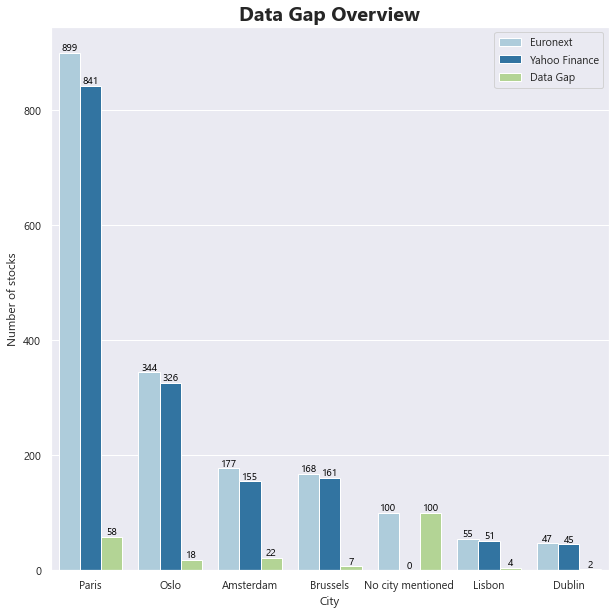

In [16]:
sns.set_theme(style='darkgrid', palette='Paired', font='Segoe UI')
fig, ax1 = plt.subplots(figsize=(10, 10))
# Add bar plot for data retrieved
sns.barplot(x='City', y='value', hue='variable', data=unpivot, ax=ax1)
# Remove title for legend on barplot
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, loc='upper right')
# Add title
ax1.set_title("Data Gap Overview", weight = 'bold').set_fontsize('20')
# Rename y-axis
ax1.set_ylabel('Number of stocks')
# Iterate through to add data labels
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
             fontsize=10, color='black', ha='center', va='bottom')


In [26]:
# View all the gaps
euronext_extraction = stock_detail.groupby(['stock_name', 'yahoo_code'], as_index=False)[
    'stock_isin'].nunique().rename(columns={'stock_isin': 'euronext_coverage'})
yahoo_finance_extraction = price_info.groupby(['stock_name', 'yahoo_code'], as_index=False)[
    'stock_isin'].nunique().rename(columns={'stock_isin': 'yahoo_finance_coverage'})
data_gaps_df = pd.merge(
    euronext_extraction,
    yahoo_finance_extraction[[
        'yahoo_code', 'yahoo_finance_coverage']],
    on='yahoo_code', how='left').fillna(0)
data_gaps_df['data_gap'] = df['euronext_coverage'] - df['yahoo_finance_coverage']
pd.set_option('display.max_rows', None)
total_data = len(data_gaps_df.index)
collected_data = len(data_gaps_df[df['data_gap'] == 0.0].index)
data_coverage = collected_data/total_data
print(f"The total data coverage is {data_coverage}%")

The total data coverage is 0.934319526627219%
